# Use the Address Column

In this notebook, we're going to explore the address column briefly.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load Data

In [2]:
data = pd.read_csv("../data/train.csv")
print(data.shape)
data.head(3)

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414


## Explore

### Address type

There are exactly two address types in this dataset

  * Block: the address contains "Block of"
  * Cross Road: the address contains "/"

In [3]:
data["Address"][:10]

0               OAK ST / LAGUNA ST
1               OAK ST / LAGUNA ST
2        VANNESS AV / GREENWICH ST
3         1500 Block of LOMBARD ST
4        100 Block of BRODERICK ST
5              0 Block of TEDDY AV
6              AVALON AV / PERU AV
7         KIRKWOOD AV / DONAHUE ST
8             600 Block of 47TH AV
9    JEFFERSON ST / LEAVENWORTH ST
Name: Address, dtype: object

In [4]:
data["Address_Type"] = np.nan

data.loc[data["Address"].str.contains("Block of"), "Address_Type"] = "Block"
data.loc[data["Address"].str.contains("/"), "Address_Type"] = "CrossRoad"

print(data.shape)
data.head()

(878049, 10)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Address_Type
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,CrossRoad
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,CrossRoad
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,CrossRoad
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,Block
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,Block


total = 878049, block = 617231, cross road = 260818, others = 0


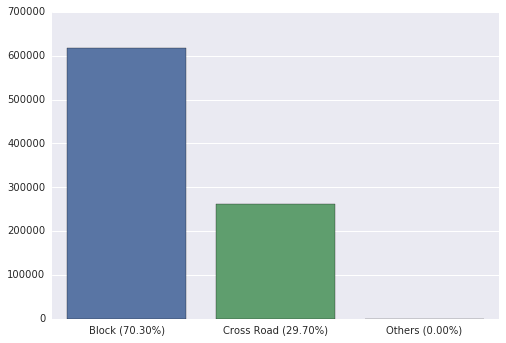

In [5]:
total_count = data.shape[0]
block_count = data[data["Address_Type"] == "Block"].shape[0]
crossroad_count = data[data["Address_Type"] == "CrossRoad"].shape[0]
others_count = total_count - (block_count + crossroad_count)

print("total = {0}, block = {1}, cross road = {2}, others = {3}" \
      .format(total_count, block_count, crossroad_count, others_count))

block_text = "Block ({0:.2f}%)".format(block_count / total_count * 100)
crossroad_text = "Cross Road ({0:.2f}%)".format(crossroad_count / total_count * 100)
others_text = "Others ({0:.2f}%)".format(others_count / total_count * 100)

barplot_x = [block_text, crossroad_text, others_text]
barplot_y = [block_count, crossroad_count, others_count]

sns.barplot(x=barplot_x, y=barplot_y)

### Distribution of crimes by address type

We plot the number of crimes occured at San Francisco by address type, then we found that our new feature would increase the accuracy of our model. Especially,

 * Most of crimes will occur in block.
 * However, some crimes(e.g prositution) will occur more in cross road.

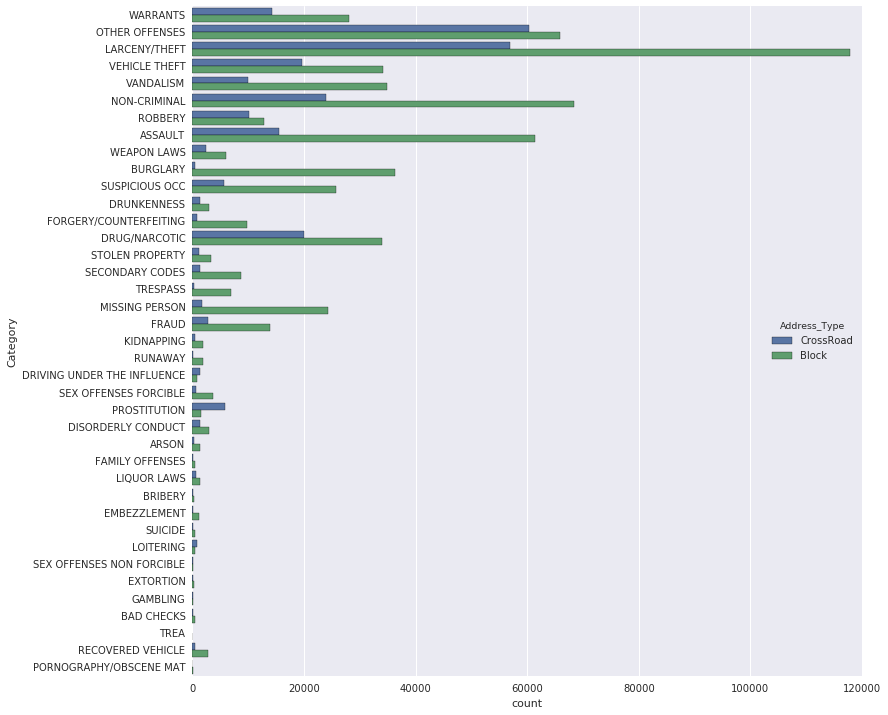

In [6]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 12))

sns.countplot(y="Category", hue="Address_Type", data=data, ax=ax)